In [28]:
import ollama
from PIL import Image
import matplotlib.pyplot as plt
import utils

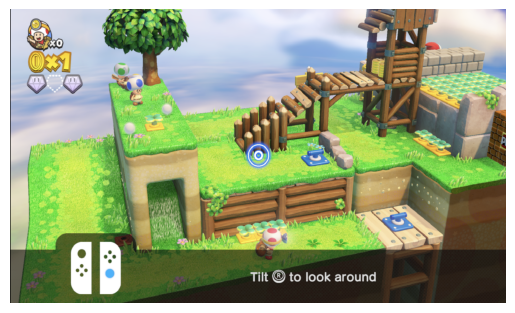

In [47]:
# IMAGE_PATH = "/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/free_fire/1.png"
IMAGE_PATH = "/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/toad/1.png"

# Load the image
image = Image.open(IMAGE_PATH)

# Display the image
plt.imshow(image)
plt.axis('off')  # Do not display axes for better visualization
plt.show()

In [52]:

PROMPT_PATH = '../prompts/gpt4-0.md'
prompts_dict = utils.markdown_to_dict(PROMPT_PATH)

with open(IMAGE_PATH, 'rb') as file:
  stream = ollama.chat(
    model='llava',
    messages=[
      {
        'role': 'user',
        'content': prompts_dict['User'],
        'images': [file.read()],
        'system': prompts_dict['System'],
        'format': 'json'
      },
    ],
    options={
      "temperature": 1.0,
      "seed": 101
    },
    stream=True
  )

for chunk in stream:
  print(chunk['message']['content'], end='', flush=True)

 ```json
{
  "action": {"move_player", "direction": ["left"]},
  "reason": "The player character in the image appears to be walking towards the left, with the game controller also pointing to the left. This suggests that an action to move the player to the left is appropriate at this moment."
}
``` 